# Projet Numérique n°2 : Equations Différentielles

## BRETAUD David , DELMAS Louis

Système d'étude : en notant $x_1$ le nombre de proies et $x_2$ le nombre de prédateurs (tous les deux positifs), on a l'évolution suivante :
$$
\left\{\begin{matrix}
 \dot{x_1} = x_1(\alpha - \beta x_2)\\ 
 \dot{x_2} = -x_2(\gamma - \delta x_1)
\end{matrix}\right.
$$
où les 4 paramètres $\alpha$, $\beta$, $\gamma$ et $\delta$ sont strictements positifs.

In [8]:
# Modules numériques à importer pour la suite
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint

# Représentation du système, réglages généraux :
a = 2   # alpha
b = 0.5    # beta
g = 1   # gamma
d = 0.4  # delta

L = 30
Int = np.linspace(0, L, 15)
LignesH = [0.2*i for i in range(-4, 5)]
LignesH2 = [2*i for i in range(0,8)]

def f(x, y):
    return [x*(a-b*y), -y*(g-d*x)]

def H(x,y):
    return d*x-g*np.log(x)+b*y-a*np.log(y)

In [10]:
# Fonctions prédéfinies d'étude : 
def f1(x,y):
    return [x*(1-1*y), -y*(1-1*x)]

def f2(x,y):
    return [x*(9-2*y), -y*(9-2*x)]

def f3(x,y):
    return [x*(1-5*y), -y*(5-1*x)]

---

## Question 1


---

La population des proies a deux processus d'évolution : 
- le processus de natalité, qui augmente la population (variation positive), et est proportionnel au nombre actuel de cette population (plus on a de géniteurs, plus on a de nouveaux nés). Ce serait le terme en $\alpha x_1$ .
- le processus de mort, qui diminue la population (variation négative). Il faut prendre en compte la mort naturelle, et la mort par prédation : plus il y a de proies, plus on a un nombre susceptible de morts important, et plus il y a de prédateurs, plus les proies sont susceptibles de mourir, d'où un terme proportionnel en $x_1*x_2$, à savoir le terme $-\beta x_1x_2$.

Concernant la population des prédateurs, les deux processus sont :
- le processus de mortalité par mort naturelle, soit le terme en $-x_2\gamma$.
- le processus de natalité. Etant une population de prédateurs, plus il y aura de proies à chasser, plus elle pourra se multiplier, et à l'inverse, moins il y a de proies, moins il y a de nourriture donc naturellement, par pression naturelle, il y aura moins d'enfantement, d'où le terme en $+x_2x_1\delta$. 

Pour résumer :
  - $\alpha$ : taux de reproduction des proies
  - $\beta$ : taux de mortalité des proies
  - $\delta$ : taux de reproduction des prédateurs
  - $\gamma$ : taux de mortalité des prédateurs

On constate bien que si le processus de natalité est plus fort que le processus de mortalité, alors la population augmente, car $\dot{x_1} > 0$, et sinon, la population diminue ce qui se traduit bien par $\dot{x_1} < 0$. 

Les points d'équilibres vérifient :
$$
\left\{\begin{matrix}
 \dot{x_1} = 0\\ 
 \dot{x_2} = 0
\end{matrix}\right.
\Leftrightarrow
\left\{\begin{matrix}
 x_1(\alpha - \beta x_2) = 0 & (1)\\ 
-x_2(\gamma - \delta x_1) = 0 & (2)
\end{matrix}\right.
$$
On voit déjà que le système est vérifié pour le point (0,0). 

On multiplie par $\delta$ la première équation et la deuxième par $\beta$ puis on additionne :
Pour avoir $(x_1,x_2)$ non nul vérifiant le système non linéaire, on doit nécessairement avoir 
$$
\left\{\begin{matrix}
\alpha - \beta x_2 = 0 & \Rightarrow x_2 = \alpha / \beta \\
\gamma - \delta x_1 = 0 & \Rightarrow x_1 = \gamma / \delta
\end{matrix}\right.
$$
Le point d'équilibre $\bar{x} = (\gamma / \delta , \alpha /\beta )$ est bien dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$. 

Voyons voir si les points sont localement asymptotiquement stable. Calculons la différentielle de $f$ définie par :
$$
f(x_1, x_2)= \bigl(\begin{smallmatrix}
x_1(\alpha - \beta x_2)\\ 
-x_2(\gamma - \delta x_1)
\end{smallmatrix}\bigr)
\rightarrow
J_f(x_1, x_2)= \bigl(\begin{smallmatrix}
\alpha - \beta x_2 & -\beta x_1\\ 
\delta x_2 & -\gamma + \delta x_1
\end{smallmatrix}\bigr)
$$
Evaluons la Jacobienne de f en $(0,0)$ et $(\gamma / \delta , \alpha /\beta )$ :
$$
J_f(0, 0)= J_1 = \bigl(\begin{smallmatrix}
\alpha & 0\\ 
0 & -\gamma 
\end{smallmatrix}\bigr)
\;\; et \; \;  
J_f(\gamma / \delta , \alpha /\beta )= J_2 =  \bigl(\begin{smallmatrix}
0 & -\beta \gamma / \delta\\ 
\delta \alpha / \beta & 0
\end{smallmatrix}\bigr)
$$
On utilise le fait qu'en dimension 2, on a l'équivalence suivante : $J \; est \; Hurwitz \Leftrightarrow tr(J) <0 \; et \; det(J)>0 \;$.

On constate que $J_1$ n'est pas Hurwitz car $\; det(J_1)=-\alpha \gamma <0 \;$ et $J_2$ non plus puisque $\; tr(J_2)=0 \;$. On ne peut donc pas conclure par cette approche. On peut cependant préciser les valeurs propres.

Pour $J_1$ : ce sont $\alpha$ et $-\gamma$. Ainsi, comme $\alpha$ est strictement positive, on peut conclure d'après le lien entre stabilité et stabilité du linéarisé tangent que le point d'équilibre $0$ est instable.

On peut faire de même pour $J_2$ : les valeurs propres sont $i\sqrt{\alpha\gamma}$ et $-i\sqrt{\alpha\gamma}$. Elles sont imaginaires pures : on ne peut donc rien conclure pour le moment sur la stabilité du point d'équilibre associé.

---

## Question 2

---

Les solutions sont périodiques, et leurs trajectoires fermées bornées. 

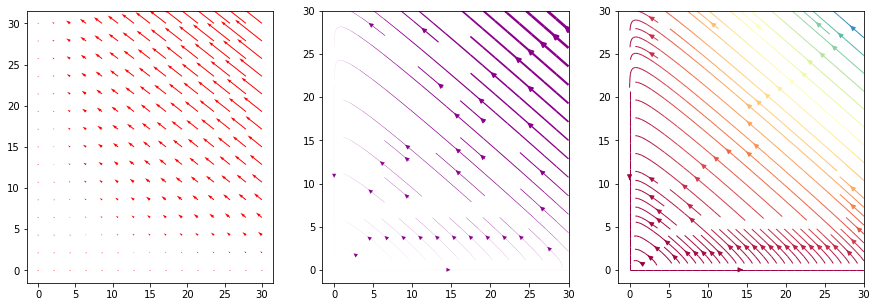

In [5]:
def portrait(f, Abs, Ord, styl) :
    X, Y = np.meshgrid(Abs, Ord)
    U, V = f(X,Y)
    speed = np.sqrt(U**2+V**2)
    lw = 3*speed/speed.max()
    
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(nrows=1, ncols=3)

    ax0 = fig.add_subplot(gs[0, 0])
    ax0.quiver(X, Y, U, V, color = 'red')
    
    ax1 = fig.add_subplot(gs[0, 1])
    ax1.streamplot(X, Y, U, V, density = 0.5, linewidth = lw, color = 'darkmagenta')

    ax2 = fig.add_subplot(gs[0, 2])
    ax2.streamplot(X, Y, U, V, color = lw, cmap=styl, linewidth = 1)

if True :
    portrait(f, Int, Int, 'Spectral')
if False :
    portrait(f1, Int/2, Int/2, 'CMRmap')
if False :
    portrait(f2, Int, Int, 'twilight_shifted_r')
if False : 
    portrait(f3, Int, Int/8, 'turbo')

---

## Question 3

---

Soit $(t_0,(x_{01},x_{02})) \in \mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+} \;$ une condition initiale fixée quelconque.

Tout d'abord, $f$ étant continue, le théorème de Péano permet de justifier qu'il existe bien des solutions au problème $\dot x=f(t,x)$ sur l'espace qui nous intéresse. 

Ensuite, le théorème du domaine maximal d'existence nous assure que toute solution maximale dans $S_f(t_0,(x_{01},x_{02}))$ est définie sur un ouvert, que l'on nommera I pour le moment. PRECISION : question 4 on nous fait déduire que justement $I=\mathbb{R}$.

Enfin, $f$ est continûment différentiable par rapport à x puisque $J_f$ est continue. On peut donc utiliser le théorème de Cauchy-Lipschitz sur I : pour toute condition initiale, il existe une unique solution maximale. 

Considérons l'unique solution maximale $x(t)$ du problème de Cauchy initialisée dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ par $x_0 = (x_{1,0}, x_{2,0})$. 

Supposons qu'il existe $t_0 \in I$ tel que $x_1(t_0) <= 0$ (le raisonnement est analogue en prenant $x_2$).

- Si $x_1(t_0) < 0$, alors comme $x_{1,0} > 0$ et que $x_1$ est continue, d'après le TVI, il existe $t_1 < t_0$ tel que $x_1(t_1) = 0$.

- Considérons alors le cas où $x_1(t_0) = 0$. Il suffit de remarquer que $x(t) = (0, x_{2,0}\exp(-\gamma t))$ est une solution maximale des équations de Lotka-Volterra avec $x_1(t_0) = 0$. Compte tenu de l'unicité de la solution maximale, on a donc $x_{1,0} = 0$ ce qui est absurde puisque $x_{1,0} > 0$.

Ainsi, toute solution maximale initialisée dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ reste dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ sur son ensemble de définition.

---

## Question 4

---

$$
\frac{dH}{dt}(x_1,x_2)= 
\left \langle \begin{pmatrix}
\delta -\gamma /x_1\\ 
\beta - \alpha /x_2
\end{pmatrix} , \begin{pmatrix}
\dot{x_1}\\ 
\dot{x_2}
\end{pmatrix}\right \rangle 
=
\left \langle \begin{pmatrix}
\delta -\gamma /x_1\\ 
\beta - \delta /x_2
\end{pmatrix} , \begin{pmatrix}
x_1(\alpha - \beta x_2)\\ 
-x_2(\gamma - \alpha x_1)
\end{pmatrix}\right \rangle
= (\delta \alpha x_1 - \gamma \alpha - \delta \beta x_1 x_2 + \gamma \beta x_2 ) + (-\beta \gamma x_2 +\gamma \alpha + \beta \delta x_1 x_2 - \delta \alpha x_1)
$$
$$
\frac{dH}{dt}(x_1,x_2)= 0
$$

Soit $x$ la solution maximale de $S_f(t_0,x_0)$ où $x_0\in \mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ : d'après la question 3, cette fonction reste dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ donc la fonction H est bien définie le long de cette solution, et reste constante.  
Nous voulons appliquer le théorème du Critère d'existence global, nous recherchons donc une majoration au plus affine de f(t,x). Le système n'étant pas linéaire, il est judicieux de montrer que $x_1$ et $x_2$ sont toutes deux bornées, et ainsi f sera elle-même bornée. On sait tout d'abord que $x_1$ et $x_2$ sont positives. Il suffit donc désormais de les majorer. 
Il est aisé de montrer, par une étude de fonction, les deux assertions suivantes :
$$
\exists A > 0 : \forall x_1 > A, \gamma \times ln(x_1) \leqslant \gamma \times x_1 /2 \\

\exists B > 0 : \forall x_2 > B, \alpha \times ln(x_2) \leqslant \beta \times x_2 /2
$$

On peut de même trouver une valeur $\omega$ telle que 
$$
\forall (x_1, x_2), 
\left\{\begin{matrix}
 \delta x_1 - \gamma ln(x_1) \geqslant \omega \\ 
\beta x_2 - \alpha ln(x_2) \geqslant \omega
\end{matrix}\right.
$$
En effet, si on note $H_1(x) = \delta x - \gamma ln(x)$ et $H_2(y)=\beta y - \alpha ln(y)$, ces deux fonctions sont minimales (grâce à la positivité de $\gamma$ et $\alpha$) et d'évaluation finie respectivement en $\gamma / \delta$ et $\alpha / \beta$ (en se plaçant sur $\mathbb{R}^{*}_{+} $). 
Reprenons l'expression de H. On peut le minorer de deux façons afin d'isoler d'une part $x_1$ et d'autre part $x_2$. 
Si $x_1 \leqslant A$ et $x_2 \leqslant B$,  on a déjà une majoration. Sinon :
$$
H(x_1, x_2) = \delta x_1 - \gamma ln(x_1) + [ \beta x_2 - \alpha ln(x_2) ] \geqslant \delta x_1 /2 + [\delta x_1 /2 - \gamma ln(x_1)] + \omega \geqslant \delta x_1 /2 + \omega \\
\Rightarrow x_1 \leqslant (H - \omega)\times 2/ \delta \\
H(x_1, x_2) = [\delta x_1 - \gamma ln(x_1)] + \beta x_2 - \alpha ln(x_2) \geqslant \beta x_2 /2 + [\beta x_2 /2 - \alpha ln(x_2)] + \omega \geqslant \beta x_2 /2 + \omega \\
\Rightarrow x_2 \leqslant (H - \omega)\times 2/ \beta
$$

Ainsi, 
$$
\left\{\begin{matrix}
0 < x_1 \leqslant max (\; (H - \omega)\times 2/ \delta \; ; \; A) \\ 
0 < x_2 \leqslant max (\; (H - \omega)\times 2/ \beta \; ; \; B)
\end{matrix}\right.
$$

Ainsi, $f(x_1, x_2)$ est donc bien bornée. Par application du théorème du critère d'existence global, nous en déduisons que les solutions maximales sont définies sur $I = \mathbb{R}$.


Pour montrer que $\bar{x}$ est stable, on peut utiliser la caractérisation par Lyapunov.
On ne se place plus sur des solutions mais on considère $x_1$ et $x_2$ comme deux variables. 
On a vu plus haut, en décomposant $H(x_1,x_2) = H_1(x_1)+H_2(x_2)$, que $H_1$ est minimale en $\gamma / \delta = \bar{x} _1$ et $H_2$ est minimale en $\alpha / \beta = \bar{x} _2$. Ainsi, en considérant la fonction G définie de $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$ dans $\mathbb{R}$ : $G(x_1, x_2) = H (x_1, x_2) - H(\bar{x})$, on a $G(\bar{x}) = 0$ et $\forall x \neq \bar{x}, \; G(x) > 0$ (dans le domaine de définition de G). G est donc bien une fonction de Lyapunov, et $ \forall x \in \mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$,
$$ 
\left \langle \; \nabla G(x)) \; | \; f(x) \; \right \rangle = \left \langle \; \nabla H(x)) \; | \; f(x) \; \right \rangle = \frac{dH}{dt}(x)= 0
$$
ce qui justifie donc que $\bar{x}$ est stable.  

---

## Question 5

---

In [6]:
def display_contour(fct, abs, ord, lvl):
    X, Y = np.meshgrid(abs, ord)
    Z = fct(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(X, Y, Z, 
    colos = 'red', linestyle = '--', levels = lvl)
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1")
    plt.ylabel("$x_2")
    plt.gca().set_aspect("equal")

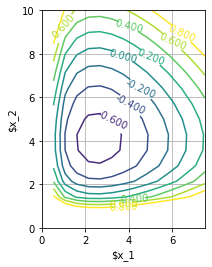

In [11]:
display_contour(H, Int/4, Int/3, LignesH)

$\bar{x}$ de coordonnées (4, 2.5) se situe confiné entre toutes les lignes fermées de niveau de H. On reconnaît bien le tracé des solutions : celles-ci semblent bien bornées et périodiques. 

On peut voir les lignes de niveau comme des équipotentielles, et plus elles se rapprochent de $\bar{x}$ , plus le potentiel est faible. $\bar{x}$ serait alors dans cette considération "à la physicienne" un minimum de potentiel, et donc un point d'équilibre stable.
Mathématiquement parlant, puisque les lignes de niveau de H suivent les solutions, on constate qu'en se rapprochant du point d'équilibre, les solutions restent arbitrairement proche de $\bar{x} $, ce qui est la définition de la stabilité d'un point d'équilibre. 

---

## Question 6

---

In [8]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t, x = [t0], [x0]
    l = int((tf-t0)/dt)
    for i in range(l):
        el = x[i] + dt*f(t[i], x[i])
        x += [list(el) if type(el) is np.ndarray else el]
        t += [t0 + (i+1)*dt]
    return t, x

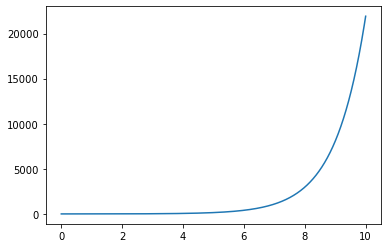

In [9]:
def exp(t, x):
    return x

t0, tf = 0, 10
dt = 10e-4
t, x = solve_euler_explicit(exp, 1, dt, t0, tf)
plt.plot(t, x) ;

On sait que le schéma d'Euler explicite est consistant d'ordre 1.

Pour le vérifier graphiquement, il suffit de tracer le logarithme de l'erreur commise et d'en déduire l'ordre.

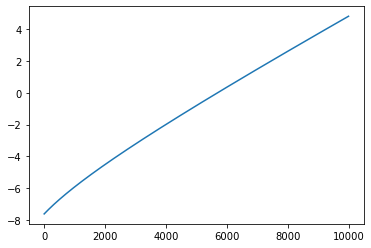

In [10]:
def mu(j):
    return la.norm(np.exp(t[j+1]) - np.exp(t[j]) - dt*exp(t[j], x[j])) / dt

mu = np.vectorize(mu)
l = int((tf-t0)/dt)
j = range(l)

plt.plot(j, np.log(mu(j))) ;

On trouve bien une droite affine, soit d'ordre 1.

---

## Question 7

---

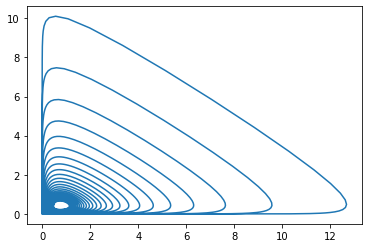

In [11]:
def F(t,x):
    return np.array(f(*x))

sol = solve_euler_explicit(F, [0.5, 0.5], 10e-3, 0.0, 100.0)
t, x = sol[0], np.array(sol[1]) # Conversion en array numpy pour effectuer des slices

plt.plot(x[:,0], x[:,1]);

En temps long, la simulation diverge complétement, ce qui n'est pas réaliste d'un point de vue biologique.
De plus, en traçant les courbes d'évolution des populations en fonction du temps, on remarque qu'on perd la périodicité des phénomènes :

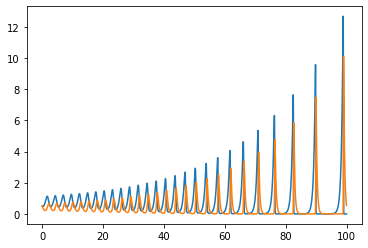

In [12]:
plt.plot(t, x[:,0]);
plt.plot(t, x[:,1]);

Traçons désormais l'évolution de H :

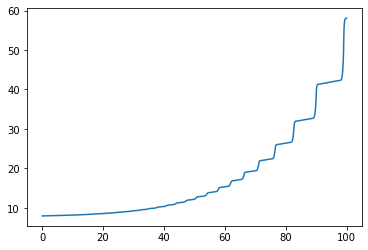

In [13]:
def H(x):
    return d*x[0] - g*np.log(x[0]) + b*x[1] - a*np.log(x[1])

h = [H(el) for el in x]
plt.plot(t, h) ;

On ne retrouve pas le caractère constant de H par rapport au temps. Ce schéma numérique est donc bien incompatible avec la résolution des équations de Lotka-Volterra.

---

## Question 8

---

In [19]:
eps = 10e-4
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t, x = solve_euler_explicit(f, x0, dt, t0, tf)
    l = int((tf-t0)/dt)
    for j in range(l):
        def F(y):
            return x[j] + dt*f(t[j+1], y)
        x_j_0 = list(x[j]) if type(x[j]) is np.ndarray else x[j]
        x_j_k = x_j_0
        x_j_k1 = F(x_j_k)
        i = 0
        while (la.norm(x_j_k1 - x_j_k) / la.norm(x_j_0) > eps) or (i < itermax):
            x_j_k = x_j_k1
            x_j_k1 = F(x_j_k)
            i += 1
        x[j] = x_j_k
    return t, x

Vérifions sa convergence sur l'équation différentielle associée à l'exponentielle :

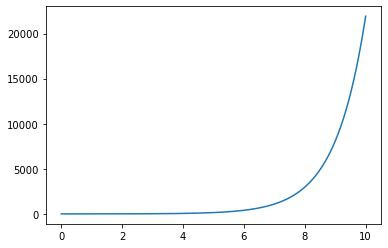

In [15]:
sol = solve_euler_implicit(exp, 1, dt, t0, tf)
plt.plot(*sol) ;

Appliquons ce schéma aux équations de Lotka-Volterra :

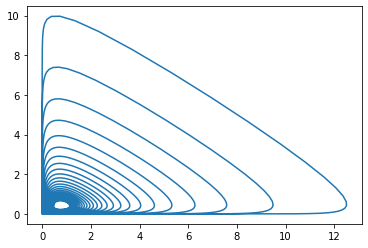

In [20]:
sol = solve_euler_implicit(F, [0.5, 0.5], 10e-3, 0.0, 100.0)
t, x = sol[0], np.array(sol[1]) # Conversion en array numpy pour effectuer des slices

plt.plot(x[:,0], x[:,1]);

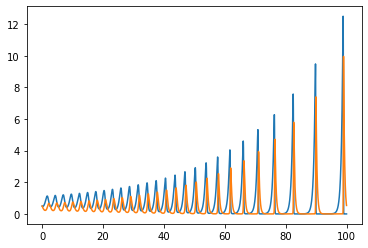

In [21]:
plt.plot(t, x[:,0]);
plt.plot(t, x[:,1]);

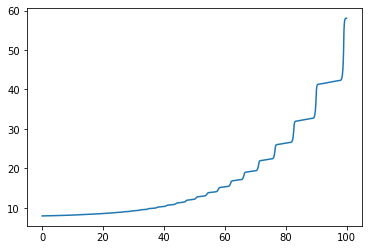

In [22]:
def H(x):
    return d*x[0] - g*np.log(x[0]) + b*x[1] - a*np.log(x[1])

h = [H(el) for el in x]
plt.plot(t, h) ;

H croît toujours, mais beaucoup moins que pour le schéma explicite.

On a donc un schéma plus pertinant, puisqu'on se rapproche de la conservation de H par rapport au temps.

 ---

## Question 10

---
Pour plus de facilité, nous nommons $f_i(x)$ le vecteur associé au système initial de Lotka-Volterra étudié dans les premières questions
$$
\frac{d}{dt}(H(x(t))-H_0) = \left \langle \; \nabla (H(x(t))-H_0) \; | \; f(x) \; \right \rangle = \left \langle \; \nabla H(x(t)) \; | \; f_i(x) - (H(x(t))-H_0)\times u(x) \; \right \rangle = -(H(x(t))-H_0) \left \langle \; \nabla H(x) \; | \; u(x) \; \right \rangle
$$

En posant $u = k \nabla H(x)$, on a $\frac{d}{dt}(H(x(t))-H_0) = -(H(x)-H_0) \left \langle \; \nabla H(x(t)) \; | \; k \nabla H(x(t)) \; \right \rangle = -k(H(x(t))-H_0)\left \| \nabla H(x(t))  \right \|^2 $  où $\nabla H(x(t)) = \begin{pmatrix} \delta -\gamma /x_1\\ \beta - \alpha /x_2 \end{pmatrix}
$. 

Supposons désormais que $x$ reste à une distance strictement positive de $\bar{x}$ : $\exists \; c>0 \; : \forall t \in \mathbb{R}, \left \|x(t)-\bar{x} \right \| \geqslant c$. Comme $\nabla H(x(t))$ ne s'annule qu'en $\bar{x}$, et qu'on impose aux solutions de ne pas s'approcher de ce point, on en déduit que $\exists \; \mu > 0 : \left \| \nabla H(x(t))  \right \| \geqslant \mu > 0 $. 
--- 
Par ailleurs, $(H(x(t))-H_0)$ est de signe constant. En effet, $(H(x(t))-H_0)$ et sa dérivée sont de signes opposés, puisque $k\times \left \| \nabla H(x(t))  \right \|^2 \geqslant 0$. Supposons qu'à un instant $t$, $(H(x(t))-H_0)<0$ : la fonction croît. Montrons qu'elle ne peut pas devenir positive par l'absurde.

Supposons $\exists \; t_1$ : $(H(x(t_1))-H_0)>0$. D'après le théorème des valeurs intermédiaires, par continuité de $(H(x(t))-H_0)$, $\exists \; t_2 <t_1 \; :\; H(x(t_2))=H_0$. En ce point alors la dérivée est elle aussi nulle, et on peut prendre pour $t_2$ le point d'annulation le plus proche de $t_1$ en amont. 

D'après le théorème des accroissements finis, $\exists \; c \in ]t_2, t_1[ \; : \frac{d}{dt}(H(x(c))-H_0)=\frac{H(x(t_1))-H_0}{t_1-t_2} > 0$. Or par définition de $t_2$ et $t_1$, sur $]t_2, t_1[, \; H(x(t))-H_0>0$ donc $H(x(c))-H_0>0$. On a donc une contradiction avec le fait que  $(H(x(t))-H_0)$ et sa dérivée sont de signes opposés. On peut montrer de même la conservation du signe, en partant de $(H(x(t))-H_0)$ positive. 

On distingue les cas positif et négatif. On choisit $k > 0$, et on pose $K=k \mu ^2 > 0$;

Si $(H(x(t))-H_0) \geqslant 0$ :
$$
\frac{d}{dt}(H(x(t))-H_0) = -k(H(x(t))-H_0)\left \| \nabla H(x(t))  \right \|^2 \leqslant -k(H(x(t))-H_0)\times \mu ^2 \\
\Rightarrow \frac{d}{dt}(H(x(t))-H_0) + K(H(x(t))-H_0) \leqslant 0  \\
$$
On multiplie l'inégalité par $exp(Kt)>0$ de sorte à faire apparaître une dérivée :
$$
\Rightarrow \frac{d}{dt}((H(x(t))-H_0)\times e^{Kt}) \leqslant 0 \\
$$
Notons $G(x(t)) = (H(x(t))-H_0)\times e^{Kt}$, qui est une fonction de même signe que $(H(x(t))-H_0)$, ici $\leqslant 0$.
$$
\frac{d}{dt}(G(x(t))) \leqslant 0 \Rightarrow G(x(t)) \; \text{est décroissante} \;\Rightarrow \forall t>0,\;G(x(t)) \leqslant G(x(0))=H(x(0))-H_0  \\
\Rightarrow 0 \leqslant H(x(t))-H_0 \leqslant G(x(0))\times e^{-Kt}
$$
Le majorant de droite tend vers 0 quand t tend vers $+\infty$, le minorant de gauche est nul (hypothèse). Par le théorème d'exitence de limite par encadrement, on en déduit que $H(x(t))$ tend vers $H_0$ de manière exponentielle.


Si $(H(x(t))-H_0) \leqslant 0$ :
$$
\frac{d}{dt}(H(x(t))-H_0) = -k(H(x(t))-H_0)\left \| \nabla H(x(t))  \right \|^2 \geqslant -k(H(x(t))-H_0)\times \mu ^2  \\
\Rightarrow \frac{d}{dt}(H(x(t))-H_0) + K(H(x(t))-H_0) \geqslant 0  \\
$$
On multiplie l'inégalité par $exp(Kt)>0$ de sorte à faire apparaître une dérivée :
$$
\Rightarrow \frac{d}{dt}((H(x(t))-H_0)\times e^{Kt}) \geqslant 0 \\
$$
Notons $G(x(t)) = (H(x(t))-H_0)\times e^{Kt}$, qui est une fonction négative par hypothèse :
$$
\frac{d}{dt}(G(x(t))) \geqslant 0 \Rightarrow G(x(t)) \; \text{est croissante} \;\Rightarrow \forall t>0,\;G(x(t)) \geqslant G(x(0))=H(x(0))-H_0 \\ 
\Rightarrow G(x(0))\times e^{-Kt} \leqslant H(x(t))-H_0 \leqslant 0
$$
Le minorant de gauche tend vers 0 quand t tend vers $+\infty$, le majorant de droite est nul (hypothèse). Par le théorème d'exitence de limite par encadrement, on en déduit que $H(x(t))$ tend vers $H_0$ de manière exponentielle.



---

## Question 11

---

Il suffit donc de considérer le système différentiel modifié :
$$
\left\{\begin{matrix}
 \dot{x_1} = x_1(\alpha - \beta x_2) - u_1(x_1, x_2)(H(x_1, x_2) - H_0)\\ 
 \dot{x_2} = -x_2(\gamma - \delta x_1) - u_2(x_1, x_2)(H(x_1, x_2) - H_0)
\end{matrix}\right.
$$
où $u = k\nabla H$, afin d'avoir une convergence exponentielle de $H$ vers $H_0$.

$k$ régit la vitesse à laquelle converge H. Cependant, nous allons voir qu'on ne peut pas choisir $k$ arbitrairement grand.

Soit $f(t) = H(x(t)) - H(x_O)$. Comme $f$ est dérivable sur $I$, on a alors au premier ordre : $f(t+dt) = f(t) + f'(t) dt$

D'où : $H(x^{j+1}) - H(x_0) = (H(x^{j}) - H(x_0))(1 - k\|\nabla{H(x(t))}\|)$

La norme étant strictement positive dans notre cas, alors si $k$ devient trop grand, on aurait : $1 - k\|\nabla{H(x(t))}\| < 0$.

Cela entrainerait donc une alternance dans les signes de la suite $(H(x^{j}) - H(x_0))_{j}$, ce qui est impossible puisqu'elle est de signe monotone d'après la question 10.
